In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
df = pd.read_json("http://export.ckartisan.com/api/export-2hs?hscode=01")
df

,id,year_at,exporter,hscode,value
0,1,2001,France,1,1098756
1,2,2002,France,1,1537512
2,3,2003,France,1,1894178
3,4,2004,France,1,1962671
4,5,2005,France,1,2138276
...,...,...,...,...,...
3439,3440,2011,Dominica,1,0
3440,3441,2012,Dominica,1,0
3441,3442,2013,Dominica,1,1
3442,3443,2015,Dominica,1,1


In [8]:
df_pivot = pd.pivot_table(df, values='value', index=['exporter'], columns=['hscode'], aggfunc=np.sum)
df_pivot = df_pivot.fillna(0)
df_pivot

hscode,1
exporter,
Afghanistan,66
Albania,13218
Algeria,713
Andorra,2051
Angola,1073
...,...
"Venezuela, Bolivarian Republic of",15086
Viet Nam,278863
Yemen,794


In [9]:
df_pivot.isnull().sum().sum()

0

In [10]:
X = df_pivot.to_numpy()
X

array([[      66],
       [   13218],
       [     713],
       [    2051],
       [    1073],
       [       4],
       [     469],
       [  443517],
       [   44256],
       [     896],
       [18955209],
       [ 2923056],
       [    3619],
       [     352],
       [   20403],
       [    1329],
       [   21460],
       [  150715],
       [ 9417351],
       [    1967],
       [      97],
       [      22],
       [     917],
       [   44214],
       [   39404],
       [ 6702257],
       [      54],
       [     894],
       [    1725],
       [  661678],
       [  140923],
       [      52],
       [   10972],
       [   10086],
       [30395437],
       [     312],
       [      51],
       [    3079],
       [  242817],
       [ 8964032],
       [     270],
       [      43],
       [ 1787241],
       [       3],
       [      95],
       [   11866],
       [       7],
       [  112172],
       [  738707],
       [   15205],
       [     665],
       [   41551],
       [ 492

In [11]:
model = TSNE(n_components=2, random_state=0)
U = model.fit_transform(X) 
U


array([[ 15.909288  , -11.70172   ],
       [  1.7751064 ,  -1.6999669 ],
       [  9.702445  ,  -7.565508  ],
       [  6.7693596 ,  -5.6822867 ],
       [  8.40634   ,  -6.826256  ],
       [ 18.332256  , -12.173283  ],
       [ 10.91589   ,  -8.632549  ],
       [-10.901018  ,   6.8373847 ],
       [ -2.4540412 ,   1.2288575 ],
       [  9.038854  ,  -7.044178  ],
       [-20.266495  ,  13.811185  ],
       [-15.959643  ,  12.082623  ],
       [  5.456081  ,  -4.6224365 ],
       [ 11.77756   ,  -9.181541  ],
       [  0.05761331,  -0.8834909 ],
       [  7.7937937 ,  -6.4929667 ],
       [ -0.09649339,  -0.7302565 ],
       [ -6.701128  ,   4.2393055 ],
       [-18.832602  ,  13.635053  ],
       [  6.861613  ,  -5.7583156 ],
       [ 15.178222  , -11.057686  ],
       [ 17.072329  , -12.68523   ],
       [  8.964467  ,  -7.003145  ],
       [ -2.4602098 ,   1.2192628 ],
       [ -2.1317647 ,   0.74681556],
       [-18.027084  ,  13.355816  ],
       [ 16.457228  , -11.572537  ],
 

In [12]:
list(U[:,0])

[15.909288,
 1.7751064,
 9.702445,
 6.7693596,
 8.40634,
 18.332256,
 10.91589,
 -10.901018,
 -2.4540412,
 9.038854,
 -20.266495,
 -15.959643,
 5.456081,
 11.77756,
 0.057613313,
 7.7937937,
 -0.096493386,
 -6.701128,
 -18.832602,
 6.861613,
 15.178222,
 17.072329,
 8.964467,
 -2.4602098,
 -2.1317647,
 -18.027084,
 16.457228,
 8.73868,
 7.140268,
 -12.689364,
 -6.6869845,
 16.534184,
 2.3648784,
 2.65621,
 -21.185389,
 12.114224,
 16.261887,
 5.857629,
 -8.605568,
 -18.71824,
 12.443385,
 16.849703,
 -15.159169,
 18.425062,
 15.093957,
 2.0913792,
 17.343203,
 -5.8877134,
 -12.842528,
 1.2291939,
 9.676955,
 -2.315691,
 -17.275501,
 6.974749,
 -19.935884,
 -10.733323,
 17.161734,
 -4.8448844,
 1.9335551,
 -9.094658,
 -6.9327755,
 9.453255,
 1.4908805,
 -11.97193,
 0.09535182,
 -14.162405,
 17.03767,
 10.10151,
 -6.1037827,
 -21.406788,
 0.9602867,
 17.722998,
 10.748393,
 15.834685,
 17.59782,
 -11.558371,
 -20.908077,
 2.447418,
 18.447142,
 -8.698475,
 17.885426,
 14.244802,
 -1.7510

In [13]:
type(U)

numpy.ndarray

In [14]:
countries = list(df_pivot.axes[0])

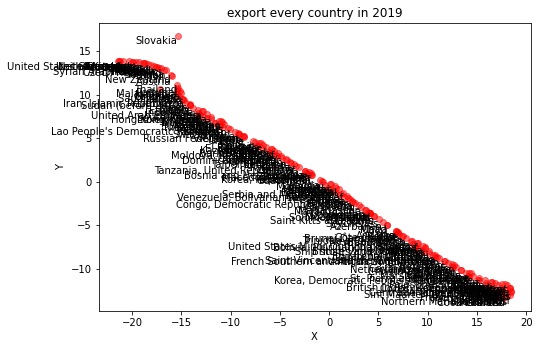

In [15]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(list(U[:,0]), list(U[:,1]), color='r', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('export every country in 2019')
for i in range(len(countries)) :
    plt.text(list(U[:,0])[i], list(U[:,1])[i], countries[i], size=10, rotation=0.,
             ha="right", va="top",
             bbox=None
             )


plt.show()